In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


1. Load the cleaned dataset from the last exercise. If you haven't saved the dataset, rerun the exercise and save the final dataset.

In [4]:
df = pd.read_csv('students_score_rijeseno.csv', index_col = 0)
df
#load the data set, with the first column as column names

,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard
Gender,,,,,,,,,,,,,,,,,
female,2,1,standard,1,1,1,1,3.0,1,1,71,71,74,1.0,0.0,0.0,1.0
female,2,5,standard,1,1,2,1,0.0,2,0,69,90,88,1.0,0.0,0.0,1.0
female,1,3,standard,1,2,2,1,4.0,1,1,87,93,91,1.0,0.0,0.0,1.0
male,0,0,free/reduced,1,1,0,0,1.0,2,0,45,56,42,0.0,1.0,1.0,0.0
male,2,5,standard,1,1,2,1,0.0,1,0,76,78,75,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
female,3,2,standard,1,2,2,0,2.0,1,0,59,61,65,1.0,0.0,0.0,1.0
male,4,2,standard,1,2,1,0,1.0,0,0,58,53,51,0.0,1.0,0.0,1.0
female,2,2,free/reduced,0,1,2,0,1.0,0,0,61,70,67,1.0,0.0,1.0,0.0


2. a) Find the mean, median and average scores in mathematics, reading and writing. <br>
   b) Find the mean, median and average scores for males and females.<br>
   c) What is the coefficient of variation of the scores? <br>

In [5]:
print(f"The mean score in reading is {df['ReadingScore'].mean()}")
print(f"The mean score in writing is {df['WritingScore'].mean()}")
print(f"The mean score in mathematics is {df['MathScore'].mean()}")
print(f"The median score in reading is {df['ReadingScore'].median()}")
print(f"The median score in writing is {df['WritingScore'].median()}")
print(f"The median score in mathematics is {df['MathScore'].median()}")
print(f"The average score in reading is {df['ReadingScore'].mode()}")
print(f"The average score in writing is {df['WritingScore'].mode()}")
print(f"The average score in mathematics is {df['MathScore'].mode()}")
print(f"The mean score in reading in relation to: {df.groupby('Gender')['ReadingScore'].mean()}")
print(f"The median score in reading in relation to: {df.groupby('Gender')['ReadingScore'].median()}")
print(f"The average score in reading in relation to: {df.groupby('Gender')['ReadingScore'].agg(pd.Series.mode)}")
print(f"The mean score in writing in relation to: {df.groupby('Gender')['WritingScore'].mean()}")
print(f"The median score in writing in relation to: {df.groupby('Gender')['WritingScore'].median()}")
print(f"The average score in writing in relation to: {df.groupby('Gender')['WritingScore'].agg(pd.Series.mode)}")
print(f"The mean score in Maths in relation to: {df.groupby('Gender')['MathScore'].mean()}")
print(f"The median score in Maths in relation to: {df.groupby('Gender')['MathScore'].median()}")
print(f"The average score in Maths in relation to: {df.groupby('Gender')['MathScore'].agg(pd.Series.mode)}")


CV_RS=df['ReadingScore'].std() / df.ReadingScore.mean() * 100 
CV_WS=df['WritingScore'].std() / df.WritingScore.mean() * 100 
CV_MS=df['MathScore'].std() / df.MathScore.mean() * 100 
print(f"The coefficient of variation of the scores in reading is {CV_RS}")
print(f"The coefficient of variation of the scores in writing is {CV_WS}")
print(f"The coefficient of variation of the scores in maths is {CV_MS}")


The mean score in reading is 69.39008139574818
The mean score in writing is 68.42933681354535
The mean score in mathematics is 66.55994779681973
The median score in reading is 70.0
The median score in writing is 69.0
The median score in mathematics is 67.0
The average score in reading is 0    65
Name: ReadingScore, dtype: int64
The average score in writing is 0    67
Name: WritingScore, dtype: int64
The average score in mathematics is 0    64
Name: MathScore, dtype: int64
The mean score in reading in relation to: Gender
female    72.900825
male      65.824657
Name: ReadingScore, dtype: float64
The median score in reading in relation to: Gender
female    73.0
male      66.0
Name: ReadingScore, dtype: float64
The average score in reading in relation to: Gender
female    65
male      65
Name: ReadingScore, dtype: int64
The mean score in writing in relation to: Gender
female    72.899189
male      63.889866
Name: WritingScore, dtype: float64
The median score in writing in relation to: Gend

3. a) Use a statistical test to test the hypothesis:<br>
H0: the mean mathematical scores of females and males are equal.



In [14]:
#ANOVA is suitable for comparing means across multiple groups, a t-test is appropriate for comparing means between two groups
#t-test:
from scipy import stats

female = df.query('Gender == "female"')
male= df.query('Gender == "male"')
#n - sample size
male_sample = male.sample(n=100, random_state=1) #random_state pamti koji sample je izabrani
female_sample = female.sample(n=100, random_state=1)

stats.ttest_ind(male_sample['MathScore'],female_sample['MathScore'])
#pvalue < 0.05 --> we can conclude that there is a statistically significant difference in mean math scores between males and females in your sample.

TtestResult(statistic=4.02106390072969, pvalue=8.234403415647197e-05, df=198.0)

4. a) Use a statistical test to test the hypothesis:<br>
   H0 Gender did not affect the writing scores.<br>
   H1 Gender affected the writing score.<br>

In [15]:
from statsmodels.stats.weightstats import ztest as ztest

In [16]:
from scipy import stats

ztest(male_sample['WritingScore'],female_sample['WritingScore'], value=0) 
#two-sample z-test to compare the means of writing scores between males and females. 
#The null hypothesis (H0) is that gender did not affect the writing scores, and the alternative hypothesis (H1) is that gender affected the writing scores.
#p value<0.05 --> gender affected the writing score (we reject H0)

(-3.499642489320263, 0.0004658825353810114)

5. a) Statisticaly test the distribuitions of female and male scores across the three scores columns.<br>
b) Plot the distributions for each of the separate scores in both genders. <br>

In [18]:
#iz auditornih
#comparing two paired groups > wilcoxon
from scipy.stats import wilcoxon

stat, p = wilcoxon(male_sample['WritingScore'],female_sample['WritingScore'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('WritingScore: Probably the same distribution')
else:
	print('WritingScore: Probably different distributions')
    

stat, p = wilcoxon(male_sample['MathScore'],female_sample['MathScore'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('MathScore: Probably the same distribution')
else:
	print('MathScore: Probably different distributions')
    

stat, p = wilcoxon(male_sample['ReadingScore'],female_sample['ReadingScore'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('ReadingScore: Probably the same distribution')
else:
	print('ReadingScore: Probably different distributions')

stat=1556.500, p=0.001
WritingScore: Probably different distributions
stat=1332.500, p=0.000
MathScore: Probably different distributions
stat=1814.500, p=0.015
ReadingScore: Probably different distributions


<Axes: >

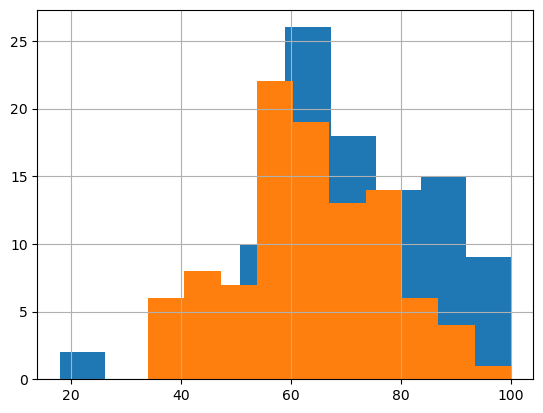

In [19]:
female_sample['WritingScore'].hist()
male_sample['WritingScore'].hist()

<Axes: >

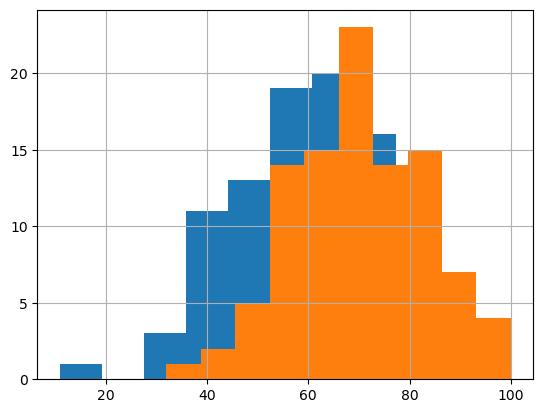

In [20]:
female_sample['MathScore'].hist()
male_sample['MathScore'].hist()

<Axes: >

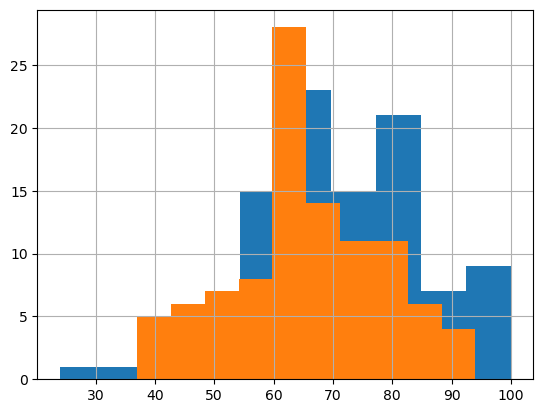

In [21]:
female_sample['ReadingScore'].hist()
male_sample['ReadingScore'].hist()